# Introduction

In this notebook, we will be working with the KS equation object.


In [1]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt

# Add the directory containing your module to sys.path
#module_path = os.path.abspath(os.path.join('..', r"A:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\code\lib" ))
#module_path = os.path.abspath(os.path.join('..', r"A:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\code\lib" ))
#sys.path.append(module_path)

from ks_solver import *


# Initialization

First, we need to initialize the object. This will require the domain, where we will first set the time and spatial domains. In our case, the spatial domain will be $x\in[0,1]$ with $N=100$ points. For the time domain, $t\in[0,1]$. i.e.:


In [2]:
x = np.linspace( 0 , 1 , num=400 )
t_bounds = (0,1)


The domain will be initialized with a simple trigonometric, $u(x,0)=sin(2\pi x)$ function for now. Thus,


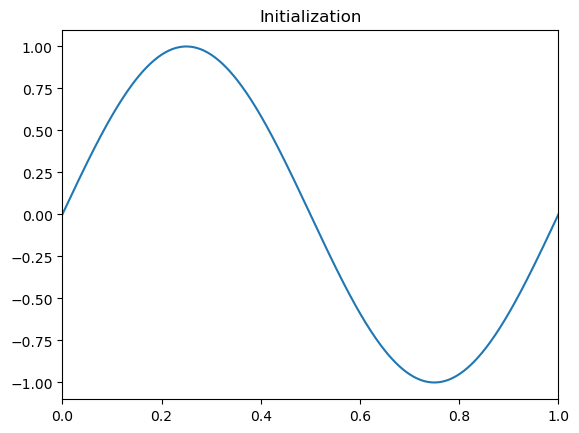

In [3]:
u_0 = np.sin( 2 * np.pi * x )

plt.plot( x , u_0 )
plt.xlim((np.min(x),np.max(x)))
plt.title("Initialization")

u_0[np.abs(u_0)<=1e-12]=0


Thus, we know the maximum value for the initialized function is 1. We will let the CFD to test the object out at 0.1. Thus,


In [4]:
CFL = 100e-3
dt = CFL * np.mean( np.gradient( x ) ) / np.max( u_0 )

dt


np.float64(0.00025062850861570974)

For now, we will use the default values for the coefficients and study their effects later on.

Let's pull up the object.


In [ ]:
ks_test = KS( x , u_0 , t_bounds , dt , alpha=-10e-6 , gamma=10e-9 )


In [6]:
ks_test.Re_cell


np.float64(250.6246242314211)

In [7]:
ks_test.KS_cell


np.float64(1.5742653892338687)

# Solve

The initialization needs to be followed by a solve. To do this, we will be using the "solve()" method that the KS object has.

The first thing we need to do is look at the matrices of the solver.


In [8]:
ks_test.solve( n_xOrder=6 , n_tOrder=4 , bc_xOrder=5 )


RK4 time stepping selected.
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:202: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using <= is inefficient, try using > instead.
  cls.A_advect[np.abs(cls.A_advect)*cls.dx<=zero_tol]=0
a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:455: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  cls.u[i+1,:] = spsr.linalg.spsolve( cls.D , cls.phi[i,:] )
a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:469: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  cls.u_1[i,:] = spsr.linalg.spsolve( cls.D , cls.phi_1[i,:] )
a:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\project\ks_solver.py:482: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  cls.u_2[i,:] = spsr.linalg.spsolve( cls.D , cls.phi_2[i,:] )
a:\Users\mtthl\Documents\Education\ME5653_CF

Hello there


In [9]:
ks_test.A_advect.toarray()[3] * ks_test.dx


array([-0.01666667,  0.15      , -0.75      ,  0.        ,  0.75      ,
       -0.15      ,  0.01666667,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [10]:
ks_test.B_diffuse.toarray()[-10] * ( ks_test.dx ** 2 )


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [11]:
ks_test.B_third.toarray()[-1] * ( ks_test.dx ** 3 )


array([  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.

In [12]:
ks_test.B_fourth.toarray()[-3] * ( ks_test.dx ** 4 )


array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [13]:
ks_test.A.toarray()[-4]


array([   0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0

In [14]:
ks_test.B.toarray()[-1]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [15]:
ks_test.D.toarray()[-2][-10:]


array([ 0.        ,  0.        ,  0.        ,  0.        , -0.2       ,
        1.25      , -3.33333333,  5.        , -5.        ,  2.28333333])

In [16]:
ks_test.Ee


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
ks_test.Re_cell


np.float64(250.6246242314211)

Everything looks formulated correct, but let's check the intermediate points.


# Solution

The first thing we can look at is the derivatives to see if we are getting the inputs to the time stepping as we would expect.


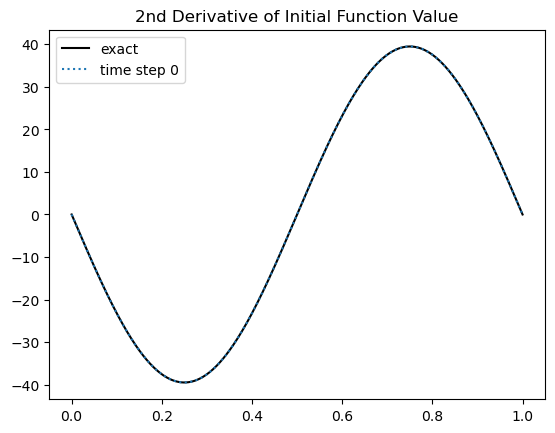

In [18]:
# Exact solutions
plt.plot( ks_test.x , - ((2*np.pi)**2) * np.sin( 2 * np.pi * ks_test.x ) , 'k' , label="exact" )

t_steps = [0]
for i , t in enumerate( t_steps ):
    plt.plot( ks_test.x , ks_test.B_diffuse.dot( ks_test.u[t] ) , ':' , label=f"time step {t}" )
    
plt.title("2nd Derivative of Initial Function Value")
plt.legend( loc = "best" )


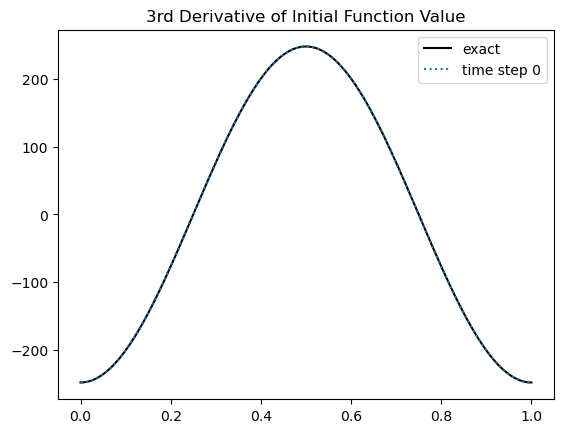

In [19]:
# Exact solutions
plt.plot( ks_test.x , - ((2*np.pi)**3) * np.cos( 2 * np.pi * ks_test.x ) , 'k' , label="exact" )

t_steps = [0]
for i , t in enumerate( t_steps ):
    plt.plot( ks_test.x , ks_test.B_third.dot( ks_test.u[t] ) , ':' , label=f"time step {t}" )   

plt.title("3rd Derivative of Initial Function Value")
plt.legend( loc = "best" )


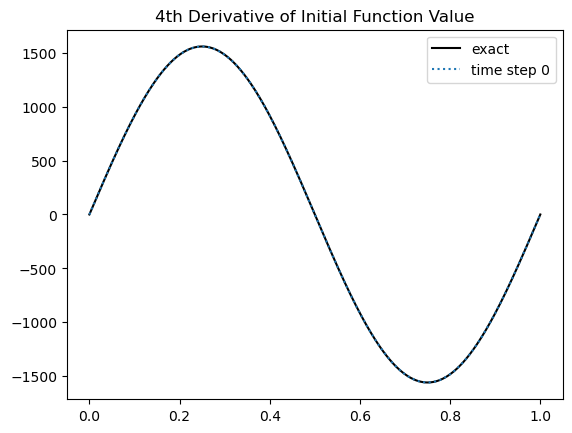

In [20]:
# Exact solutions
plt.plot( ks_test.x , ((2*np.pi)**4) * np.sin( 2 * np.pi * ks_test.x ) , 'k' , label="exact" )

t_steps = [0]
for i , t in enumerate( t_steps ):
    plt.plot( ks_test.x , ks_test.B_fourth.dot( ks_test.u[t] ) , ':' , label=f"time step {t}" )
    
plt.title("4th Derivative of Initial Function Value")
plt.legend( loc = "best" )


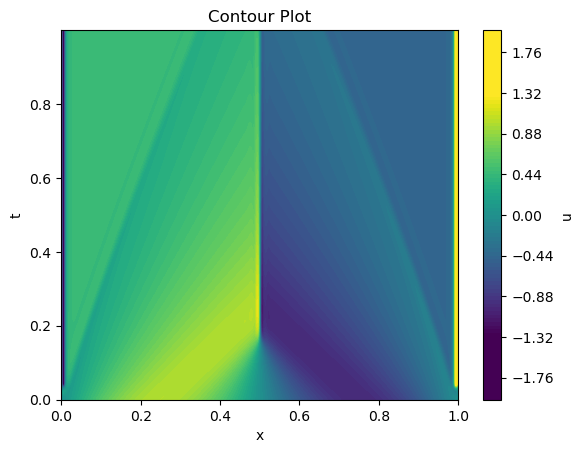

In [21]:
x = ks_test.x
y = ks_test.t
X , Y = np.meshgrid( x , y )
Z = ks_test.u

# Set the limits for the color scale
contour = plt.contourf(X, Y, Z, levels=100, cmap='viridis', vmin=-1.3, vmax=1.3 )

# Add a colorbar
cbar = plt.colorbar(contour)
cbar.set_label('u')

# Add axis labels
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour Plot')

plt.show()


In [22]:
stop here


SyntaxError: invalid syntax (1116318007.py, line 1)

# Convergence Test

The most important thing for the solver is showing that we do have a solver of the order that we expect.

The simplest way for the spatial gradients is to look at the convergence for our test trigonometric function. 

For the first, point, we will use the same 100 points as in the case to get the data working.


In [ ]:
x = np.linspace( 0 , 1 , num=100 )
t_bounds = (0,2)

u_0 = np.sin( 2 * np.pi * x )

CFL = 0.1
dt = CFL * np.mean( np.gradient( x ) ) / np.max( u_0 )

ks_c1 = KS( x , u_0 , t_bounds , dt , alpha=-10e-6 , gamma=1e-9 )
ks_c1.solve( n_xOrder=4 , n_tOrder=4 , bc_xOrder=1 )


RK4 time stepping selected.
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Hello there


Now, we can double the resolution to 200 points


In [ ]:
x = np.linspace( 0 , 1 , num=200 )
t_bounds = (0,2)

u_0 = np.sin( 2 * np.pi * x )

CFL = 0.1
dt = CFL * np.mean( np.gradient( x ) ) / np.max( u_0 )

ks_c2 = KS( x , u_0 , t_bounds , dt , alpha=-10e-6 , gamma=1e-9 )
ks_c2.solve( n_xOrder=4 , n_tOrder=4 , bc_xOrder=1 )


RK4 time stepping selected.
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Hello there


In [ ]:
x = np.linspace( 0 , 1 , num=400 )
t_bounds = (0,2)

u_0 = np.sin( 2 * np.pi * x )

CFL = 0.1
dt = CFL * np.mean( np.gradient( x ) ) / np.max( u_0 )

ks_c3 = KS( x , u_0 , t_bounds , dt , alpha=-10e-6 , gamma=1e-9 )
ks_c3.solve( n_xOrder=4 , n_tOrder=4 , bc_xOrder=1 )


RK4 time stepping selected.
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Hello there


First, let's check the 1st derivative


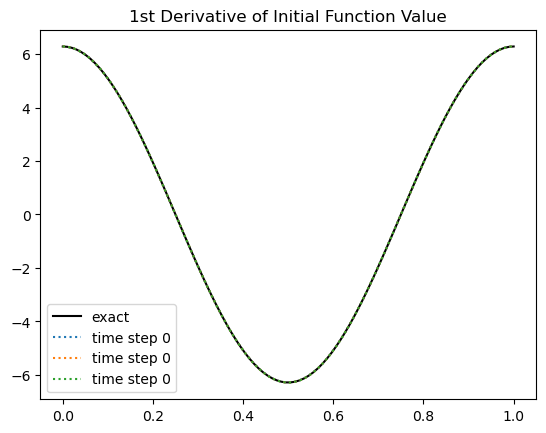

In [ ]:
# Exact solutions
plt.plot( ks_c1.x , (2*np.pi) * np.cos( 2 * np.pi * ks_c1.x ) , 'k' , label="exact" )

t_steps = [0]
net_error = np.zeros(3)

# 100 points
error_1 = np.zeros_like( ks_c1.x )
for i , t in enumerate( t_steps ):
    plt.plot( ks_c1.x , ks_c1.A_advect.dot( ks_c1.u[t] ) , ':' , label=f"time step {t}" )
    error_1 = ks_c1.A_advect.dot( ks_c1.u[t] ) - (2*np.pi) * np.cos( 2 * np.pi * ks_c1.x )
net_error[0] = np.linalg.norm( error_1[2:-2] ) / len( error_1[2:-2] )
    
# 200 points
error_2 = np.zeros_like( ks_c2.x )
for i , t in enumerate( t_steps ):
    plt.plot( ks_c2.x , ks_c2.A_advect.dot( ks_c2.u[t] ) , ':' , label=f"time step {t}" )
    error_2 = ks_c2.A_advect.dot( ks_c2.u[t] ) - (2*np.pi) * np.cos( 2 * np.pi * ks_c2.x )
net_error[1] = np.linalg.norm( error_2[2:-2] ) / len( error_1[2:-2] )

# 400 points
error_3 = np.zeros_like( ks_c3.x )
for i , t in enumerate( t_steps ):
    plt.plot( ks_c3.x , ks_c3.A_advect.dot( ks_c3.u[t] ) , ':' , label=f"time step {t}" )
    error_3 = ks_c3.A_advect.dot( ks_c3.u[t] ) - (2*np.pi) * np.cos( 2 * np.pi * ks_c3.x )
net_error[2] = np.linalg.norm( error_3[2:-2] ) / len( error_1[2:-2] )

plt.title("1st Derivative of Initial Function Value")
plt.legend( loc = "best" )


Text(0.5, 1.0, 'Convergence Plot for 1st Derivative')

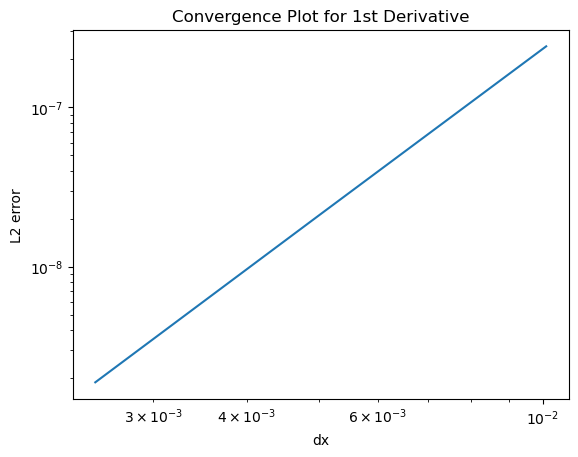

In [ ]:
dx_s = [ ks_c1.dx , ks_c2.dx , ks_c3.dx ]

plt.loglog( dx_s , net_error )
plt.xlabel( "dx" )
plt.ylabel( "L2 error" )
plt.title("Convergence Plot for 1st Derivative")


In [ ]:
conv_value = np.log( ( net_error[2] - net_error[1] ) / ( net_error[1] - net_error[0] ) ) / np.log( 2 ) 
conv_value


np.float64(-3.5020713464831745)

Thus, for convection, it is a roughly 4th order scheme.

Now, let's look at the diffusion, or 2nd derivative.


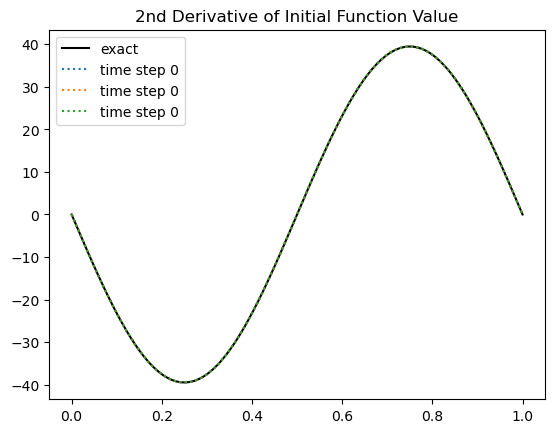

In [ ]:
# Exact solutions
plt.plot( ks_c1.x ,  -((2*np.pi)**2) * np.sin( 2 * np.pi * ks_c1.x ) , 'k' , label="exact" )

t_steps = [0]
net_error_2 = np.zeros(3)

# 100 points
error_1 = np.zeros_like( ks_c1.x )
for i , t in enumerate( t_steps ):
    plt.plot( ks_c1.x , ks_c1.B_diffuse.dot( ks_c1.u[t] ) , ':' , label=f"time step {t}" )
    error_1 = ks_c1.B_diffuse.dot( ks_c1.u[t] ) + ((2*np.pi)**2) * np.sin( 2 * np.pi * ks_c1.x )
net_error_2[0] = np.linalg.norm( error_1[2:-2] ) / len( error_1[2:-2] )
    
# 200 points
error_2 = np.zeros_like( ks_c2.x )
for i , t in enumerate( t_steps ):
    plt.plot( ks_c2.x , ks_c2.B_diffuse.dot( ks_c2.u[t] ) , ':' , label=f"time step {t}" )
    error_2 = ks_c2.B_diffuse.dot( ks_c2.u[t] ) + ((2*np.pi)**2) * np.sin( 2 * np.pi * ks_c2.x )
net_error_2[1] = np.linalg.norm( error_2[2:-2] ) / len( error_2[2:-2] )

# 400 points
error_3 = np.zeros_like( ks_c3.x )
for i , t in enumerate( t_steps ):
    plt.plot( ks_c3.x , ks_c3.B_diffuse.dot( ks_c3.u[t] ) , ':' , label=f"time step {t}" )
    error_3 = ks_c3.B_diffuse.dot( ks_c3.u[t] ) + ((2*np.pi)**2) * np.sin( 2 * np.pi * ks_c3.x )
net_error_2[2] = np.linalg.norm( error_3[2:-2] ) / len( error_3[2:-2] )

plt.title("2nd Derivative of Initial Function Value")
plt.legend( loc = "best" )


Text(0.5, 1.0, 'Convergence Plot for 2nd Derivative')

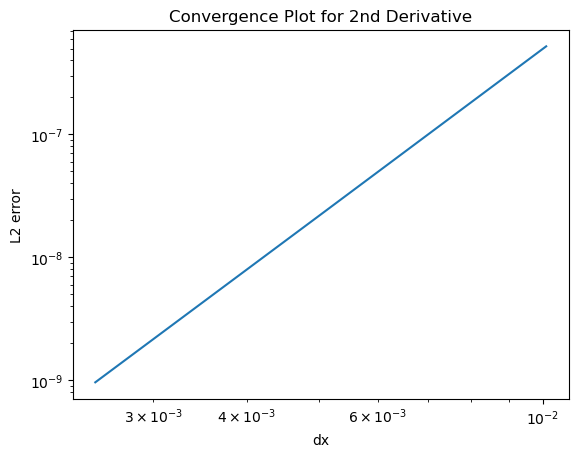

In [ ]:
dx_s = [ ks_c1.dx , ks_c2.dx , ks_c3.dx ]

plt.loglog( dx_s , net_error_2 )
plt.xlabel( "dx" )
plt.ylabel( "L2 error" )
plt.title("Convergence Plot for 2nd Derivative")


In [ ]:
conv_value = np.log( ( net_error_2[2] - net_error_2[1] ) / ( net_error_2[1] - net_error_2[0] ) ) / np.log( 2 ) 
conv_value


np.float64(-4.555870370202127)

This looks good.

Let's look at the 3rd derivative.


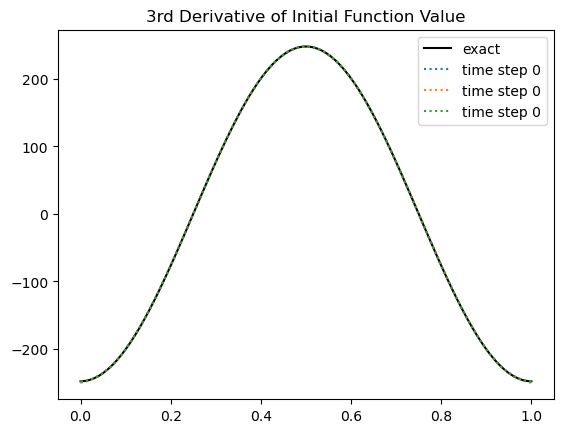

In [ ]:
# Exact solutions
plt.plot( ks_c1.x ,  -((2*np.pi)**3) * np.cos( 2 * np.pi * ks_c1.x ) , 'k' , label="exact" )

t_steps = [0]
net_error_2 = np.zeros(3)

# 100 points
error_1 = np.zeros_like( ks_c1.x )
for i , t in enumerate( t_steps ):
    plt.plot( ks_c1.x , ks_c1.B_third.dot( ks_c1.u[t] ) , ':' , label=f"time step {t}" )
    error_1 = ks_c1.B_third.dot( ks_c1.u[t] ) + ((2*np.pi)**3) * np.cos( 2 * np.pi * ks_c1.x )
net_error_2[0] = np.linalg.norm( error_1[5:-5] ) / len( error_1[5:-5] )
    
# 200 points
error_2 = np.zeros_like( ks_c2.x )
for i , t in enumerate( t_steps ):
    plt.plot( ks_c2.x , ks_c2.B_third.dot( ks_c2.u[t] ) , ':' , label=f"time step {t}" )
    error_2 = ks_c2.B_third.dot( ks_c2.u[t] ) + ((2*np.pi)**3) * np.cos( 2 * np.pi * ks_c2.x )
net_error_2[1] = np.linalg.norm( error_2[5:-5] ) / len( error_2[5:-5] )

# 400 points
error_3 = np.zeros_like( ks_c3.x )
for i , t in enumerate( t_steps ):
    plt.plot( ks_c3.x , ks_c3.B_third.dot( ks_c3.u[t] ) , ':' , label=f"time step {t}" )
    error_3 = ks_c3.B_third.dot( ks_c3.u[t] ) + ((2*np.pi)**3) * np.cos( 2 * np.pi * ks_c3.x )
net_error_2[2] = np.linalg.norm( error_3[5:-5] ) / len( error_3[5:-5] )

plt.title("3rd Derivative of Initial Function Value")
plt.legend( loc = "best" )


Text(0.5, 1.0, 'Convergence Plot for 3rd Derivative')

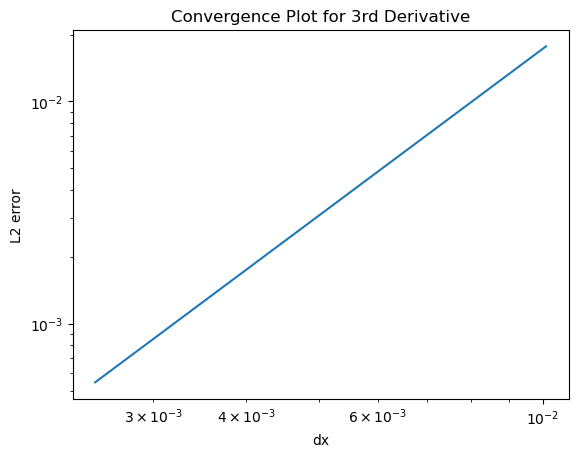

In [ ]:
dx_s = [ ks_c1.dx , ks_c2.dx , ks_c3.dx ]

plt.loglog( dx_s , net_error_2 )
plt.xlabel( "dx" )
plt.ylabel( "L2 error" )
plt.title("Convergence Plot for 3rd Derivative")


In [ ]:
conv_value = np.log( ( net_error_2[2] - net_error_2[1] ) / ( net_error_2[1] - net_error_2[0] ) ) / np.log( 2 ) 
conv_value


np.float64(-2.5174958579859523)

Not sure what happened here.

Let's look at the 4th derivative.


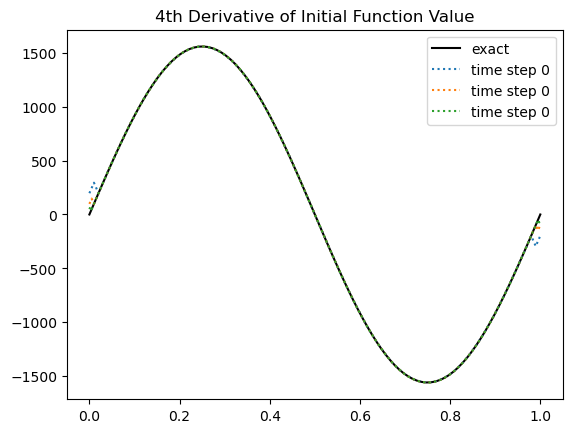

In [ ]:
# Exact solutions
plt.plot( ks_c1.x ,  ((2*np.pi)**4) * np.sin( 2 * np.pi * ks_c1.x ) , 'k' , label="exact" )

t_steps = [0]
net_error_2 = np.zeros(3)

# 100 points
error_1 = np.zeros_like( ks_c1.x )
for i , t in enumerate( t_steps ):
    plt.plot( ks_c1.x , ks_c1.B_fourth.dot( ks_c1.u[t] ) , ':' , label=f"time step {t}" )
    error_1 = ks_c1.B_fourth.dot( ks_c1.u[t] ) - ((2*np.pi)**4) * np.sin( 2 * np.pi * ks_c1.x )
net_error_2[0] = np.linalg.norm( error_1[3:-3] ) / len( error_1[3:-3] )
    
# 200 points
error_2 = np.zeros_like( ks_c2.x )
for i , t in enumerate( t_steps ):
    plt.plot( ks_c2.x , ks_c2.B_fourth.dot( ks_c2.u[t] ) , ':' , label=f"time step {t}" )
    error_2 = ks_c2.B_fourth.dot( ks_c2.u[t] ) - ((2*np.pi)**4) * np.sin( 2 * np.pi * ks_c2.x )
net_error_2[1] = np.linalg.norm( error_2[3:-3] ) / len( error_2[3:-3] )

# 400 points
error_3 = np.zeros_like( ks_c3.x )
for i , t in enumerate( t_steps ):
    plt.plot( ks_c3.x , ks_c3.B_fourth.dot( ks_c3.u[t] ) , ':' , label=f"time step {t}" )
    error_3 = ks_c3.B_fourth.dot( ks_c3.u[t] ) - ((2*np.pi)**4) * np.sin( 2 * np.pi * ks_c3.x )
net_error_2[2] = np.linalg.norm( error_3[3:-3] ) / len( error_3[3:-3] )

plt.title("4th Derivative of Initial Function Value")
plt.legend( loc = "best" )


Text(0.5, 1.0, 'Convergence Plot for 4th Derivative')

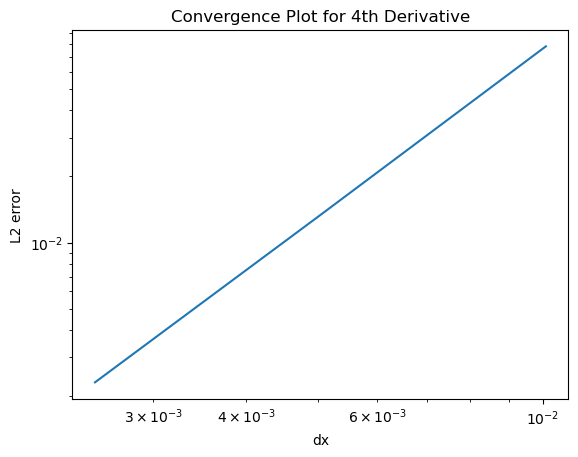

In [ ]:
dx_s = [ ks_c1.dx , ks_c2.dx , ks_c3.dx ]

plt.loglog( dx_s , net_error_2 )
plt.xlabel( "dx" )
plt.ylabel( "L2 error" )
plt.title("Convergence Plot for 4th Derivative")


In [ ]:
conv_value = np.log( ( net_error_2[2] - net_error_2[1] ) / ( net_error_2[1] - net_error_2[0] ) ) / np.log( 2 ) 
conv_value


np.float64(-2.5611824474212046)